# Area Correlation
Author: Joel Enrique Díaz Villanueva   
Organisation: Universidad de Monterrey   

---

<a name="python-implementation"></a>
## Python implementation

<a name='required-standard-libraries'></a>
### Required standard libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_key = pd.read_excel('/content/key.xlsx')
df_key

,PHASE,PTID,RID,VISCODE,VISCODE2,IMAGEUID,EXAMDATE,RUNDATE,STATUS,FSVER,...,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,update_stamp
0,ADNI1,031_S_0830,830,m24,m24,124115,2008-09-25,2024-11-15,partial,7.2.0,...,208502.547015,203830.985954,412333.532969,219142.5,208280.5,427423,46707,561777.532969,933370,2024-12-02 08:27:54
1,ADNI2,006_S_4363,4363,v11,m12,352001,2012-12-14,2022-08-08,partial,7.2.0,...,185543.376436,193573.580121,379116.956557,224001.0,220582.0,444583,47537,518009.956557,910735,2024-12-02 08:27:54
2,ADNI2,128_S_2130,2130,v11,m24,357762,2013-01-23,2022-10-05,partial,7.2.0,...,239542.502215,236423.755132,475966.257347,243608.5,244524.5,488133,52827,624747.257347,1100779,2024-12-02 08:27:54
3,ADNI2,072_S_4462,4462,v11,m12,363365,2013-02-14,2022-08-14,partial,7.2.0,...,213506.008898,219250.995311,432757.004209,235555.5,244794.5,480350,52125,597270.004209,1041063,2024-12-02 08:27:54
4,ADNI2,137_S_0972,972,v11,m72,357731,2012-11-30,2022-10-01,partial,7.2.0,...,193444.767932,201071.736265,394516.504197,206994.0,208707.0,415701,48768,544949.504197,899071,2024-12-02 08:27:54
5,ADNI2,099_S_4157,4157,v11,m12,340545,2012-09-25,2022-08-14,partial,7.2.0,...,178577.941375,175400.423423,353978.364798,189164.5,187911.5,377076,42682,492273.364798,816837,2024-12-02 08:27:54
6,ADNI2,032_S_4823,4823,v11,m12,388428,2013-07-22,2022-09-25,partial,7.2.0,...,196587.119500,191141.854000,387728.973500,190203.5,200277.5,390481,41302,533628.973500,895553,00:27:54
7,ADNI2,130_S_2373,2373,v21,m36,424962,2014-05-12,2022-10-11,partial,7.2.0,...,159716.557143,157629.596426,317346.153569,179704.0,180506.0,360210,39407,432662.153569,743783,2024-12-02 08:27:54
8,ADNI2,041_S_4720,4720,v11,m12,374625,2013-05-17,2022-09-25,partial,7.2.0,...,229640.691294,233271.551629,462912.242922,235736.0,238934.0,474670,56196,613640.242922,1035211,2024-12-02 08:27:54
9,ADNI2,137_S_4623,4623,v11,m12,373201,2013-05-13,2022-10-03,partial,7.2.0,...,216145.839696,218050.687075,434196.526771,229295.0,228576.0,457871,54306,594187.526771,974162,2024-12-02 08:27:54


In [ ]:
# Filter only columns ending in "SA" and the "PTID" column
df_filtered = df_key.filter(regex='SA$|^PTID$')

df_filtered = df_filtered.T

df_filtered

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
PTID,031_S_0830,006_S_4363,128_S_2130,072_S_4462,137_S_0972,099_S_4157,032_S_4823,130_S_2373,041_S_4720,137_S_4623,...,114_S_5047,002_S_1268,041_S_4138,037_S_4030,035_S_4582,002_S_4746,022_S_2087,130_S_2403,067_S_2195,137_S_4331
ST102SA,1306,1292,1507,1690,1627,1087,1482,1097,1578,1411,...,1509,1441,1274,1188,1505,1370,1312,1571,1523,1480
ST103SA,569,515,631,843,637,500,771,451,609,635,...,602,650,576,524,455,605,563,551,639,673
ST104SA,1296,1123,1042,1367,1288,1025,1361,1014,1537,1238,...,1250,1126,1241,1490,1095,1180,1144,1436,1452,1321
ST105SA,939,724,822,771,750,572,773,689,951,782,...,725,871,732,829,703,729,923,784,701,791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST94SA,4804,4448,7091,5882,3888,3973,5557,3765,4996,4033,...,3819,4263,4997,4887,5055,4795,4032,4395,5920,4613
ST95SA,2826,2223,2570,2586,2524,2054,2055,2126,2699,2249,...,2553,2483,2139,2322,2258,2536,2819,2722,2400,2501
ST97SA,3320,2937,4400,4263,2658,2455,2972,3005,3586,2675,...,2534,2983,2774,3195,2419,3276,3411,3255,2789,3155
ST98SA,1787,2088,2078,1975,1921,1876,1960,1725,2018,1984,...,2119,1825,1692,1972,2117,2025,1949,2091,2290,1838


Add new patients from the ADNI database (Freesurfer 7.4.1)

ST102SA: Surface Area of RightParacentral

ST103SA: Surface Area of RightParahippocampal

ST104SA: Surface Area of RightParsOpercularis

ST105SA: Surface Area of RightParsOrbitalis

ST106SA: Surface Area of RightParsTriangularis

ST107SA: Surface Area of RightPericalcarine

ST108SA: Surface Area of RightPostcentral

ST109SA: Surface Area of RightPosteriorCingulate

ST110SA: Surface Area of RightPrecentral

ST111SA: Surface Area of RightPrecuneus

ST113SA: Surface Area of RightRostralAnteriorCingulate

ST114SA: Surface Area of RightRostralMiddleFrontal

ST115SA: Surface Area of RightSuperiorFrontal

ST116SA: Surface Area of RightSuperiorParietal

ST117SA: Surface Area of RightSuperiorTemporal

ST118SA: Surface Area of RightSupramarginal

ST119SA: Surface Area of RightTemporalPole

ST121SA: Surface Area of RightTransverseTemporal

ST129SA: Surface Area of LeftInsula

ST130SA: Surface Area of RightInsula

ST13SA: Surface Area of LeftBankssts

ST14SA: Surface Area of LeftCaudalAnteriorCingulate

ST15SA: Surface Area of LeftCaudalMiddleFrontal

ST23SA: Surface Area of LeftCuneus

ST24SA: Surface Area of LeftEntorhinal

ST25SA: Surface Area of LeftFrontalPole

ST26SA: Surface Area of LeftFusiform

ST28SA: Surface Area of LeftHemisphereWM

ST31SA: Surface Area of LeftInferiorParietal

ST32SA: Surface Area of LeftInferiorTemporal

ST34SA: Surface Area of LeftIsthmusCingulate

ST35SA: Surface Area of LeftLateralOccipital

ST36SA: Surface Area of LeftLateralOrbitofrontal

ST38SA: Surface Area of LeftLingual

ST39SA: Surface Area of LeftMedialOrbitofrontal

ST40SA: Surface Area of LeftMiddleTemporal

ST43SA: Surface Area of LeftParacentral

ST44SA: Surface Area of LeftParahippocampal

ST45SA: Surface Area of LeftParsOpercularis

ST46SA: Surface Area of LeftParsOrbitalis

ST47SA: Surface Area of LeftParsTriangularis

ST48SA: Surface Area of LeftPericalcarine


ST49SA: Surface Area of LeftPostcentral

ST50SA: Surface Area of LeftPosteriorCingulate

ST51SA: Surface Area of LeftPrecentral

ST52SA: Surface Area of LeftPrecuneus

ST54SA: Surface Area of LeftRostralAnteriorCingulate

ST55SA: Surface Area of LeftRostralMiddleFrontal

ST56SA: Surface Area of LeftSuperiorFrontal

ST57SA: Surface Area of LeftSuperiorParietal

ST58SA: Surface Area of LeftSuperiorTemporal

ST59SA: Surface Area of LeftSupramarginal

ST60SA: Surface Area of LeftTemporalPole

ST62SA: Surface Area of LeftTransverseTemporal

ST72SA: Surface Area of RightBankssts

ST73SA: Surface Area of RightCaudalAnteriorCingulate

ST74SA: Surface Area of RightCaudalMiddleFrontal

ST82SA: Surface Area of RightCuneus

ST83SA: Surface Area of RightEntorhinal

ST84SA: Surface Area of RightFrontalPole

ST85SA: Surface Area of RightFusiform

ST90SA: Surface Area of RightInferiorParietal

ST91SA: Surface Area of RightInferiorTemporal

ST93SA: Surface Area of RightIsthmusCingulate

ST94SA: Surface Area of RightLateralOccipital

ST95SA: Surface Area of RightLateralOrbitofrontal

ST97SA: Surface Area of RightLingual

ST98SA: Surface Area of RightMedialOrbitofrontal

ST99SA: Surface Area of RightMiddleTemporal

In [ ]:
# Page 1
df_filtered.rename(index={'ST102SA': 'ctx-rh-paracentral'}, inplace=True)
df_filtered.rename(index={'ST103SA': 'ctx-rh-parahippocampal'}, inplace=True)
df_filtered.rename(index={'ST104SA': 'ctx-rh-parsopercularis'}, inplace=True)
df_filtered.rename(index={'ST105SA': 'ctx-rh-parsorbitalis'}, inplace=True)
df_filtered.rename(index={'ST106SA': 'ctx-rh-parstriangularis'}, inplace=True)
df_filtered.rename(index={'ST107SA': 'ctx-rh-pericalcarine'}, inplace=True)
df_filtered.rename(index={'ST108SA': 'ctx-rh-postcentral'}, inplace=True)
df_filtered.rename(index={'ST109SA': 'ctx-rh-posteriorcingulate'}, inplace=True)
df_filtered.rename(index={'ST110SA': 'ctx-rh-precentral'}, inplace=True)
df_filtered.rename(index={'ST111SA': 'ctx-rh-precuneus'}, inplace=True)
df_filtered.rename(index={'ST113SA': 'ctx-rh-rostralanteriorcingulate'}, inplace=True)
df_filtered.rename(index={'ST114SA': 'ctx-rh-rostralmiddlefrontal'}, inplace=True)
df_filtered.rename(index={'ST115SA': 'ctx-rh-superiorfrontal'}, inplace=True)
df_filtered.rename(index={'ST116SA': 'ctx-rh-superiorparietal'}, inplace=True)
df_filtered.rename(index={'ST117SA': 'ctx-rh-superiortemporal'}, inplace=True)
df_filtered.rename(index={'ST118SA': 'ctx-rh-supramarginal'}, inplace=True)
df_filtered.rename(index={'ST119SA': 'ctx-rh-temporalpole'}, inplace=True)
df_filtered.rename(index={'ST121SA': 'ctx-rh-transversetemporal'}, inplace=True)
df_filtered.rename(index={'ST129SA': 'ctx-lh-insula'}, inplace=True)
df_filtered.rename(index={'ST130SA': 'ctx-rh-insula'}, inplace=True)
df_filtered.rename(index={'ST13SA': 'ctx-lh-bankssts'}, inplace=True)
df_filtered.rename(index={'ST14SA': 'ctx-lh-caudalanteriorcingulate'}, inplace=True)
df_filtered.rename(index={'ST15SA': 'ctx-lh-caudalmiddlefrontal'}, inplace=True)
df_filtered.rename(index={'ST23SA': 'ctx-lh-cuneus'}, inplace=True)

# Page 2
df_filtered.rename(index={'ST24SA': 'ctx-lh-entorhinal'}, inplace=True)
df_filtered.rename(index={'ST25SA': 'ctx-lh-frontalpole'}, inplace=True)
df_filtered.rename(index={'ST26SA': 'ctx-lh-fusiform'}, inplace=True)
df_filtered.rename(index={'ST31SA': 'ctx-lh-inferiorparietal'}, inplace=True)
df_filtered.rename(index={'ST32SA': 'ctx-lh-inferiortemporal'}, inplace=True)
df_filtered.rename(index={'ST34SA': 'ctx-lh-isthmuscingulate'}, inplace=True)
df_filtered.rename(index={'ST35SA': 'ctx-lh-lateraloccipital'}, inplace=True)
df_filtered.rename(index={'ST36SA': 'ctx-lh-lateralorbitofrontal'}, inplace=True)
df_filtered.rename(index={'ST38SA': 'ctx-lh-lingual'}, inplace=True)
df_filtered.rename(index={'ST39SA': 'ctx-lh-medialorbitofrontal'}, inplace=True)
df_filtered.rename(index={'ST40SA': 'ctx-lh-middletemporal'}, inplace=True)
df_filtered.rename(index={'ST43SA': 'ctx-lh-paracentral'}, inplace=True)
df_filtered.rename(index={'ST44SA': 'ctx-lh-parahippocampal'}, inplace=True)
df_filtered.rename(index={'ST45SA': 'ctx-lh-parsopercularis'}, inplace=True)
df_filtered.rename(index={'ST46SA': 'ctx-lh-parsorbitalis'}, inplace=True)
df_filtered.rename(index={'ST47SA': 'ctx-lh-parstriangularis'}, inplace=True)
df_filtered.rename(index={'ST48SA': 'ctx-lh-pericalcarine'}, inplace=True)
df_filtered.rename(index={'ST49SA': 'ctx-lh-postcentral'}, inplace=True)
df_filtered.rename(index={'ST50SA': 'ctx-lh-posteriorcingulate'}, inplace=True)
df_filtered.rename(index={'ST51SA': 'ctx-lh-precentral'}, inplace=True)
df_filtered.rename(index={'ST52SA': 'ctx-lh-precuneus'}, inplace=True)
df_filtered.rename(index={'ST54SA': 'ctx-lh-rostralanteriorcingulate'}, inplace=True)
df_filtered.rename(index={'ST55SA': 'ctx-lh-rostralmiddlefrontal'}, inplace=True)
df_filtered.rename(index={'ST56SA': 'ctx-lh-superiorfrontal'}, inplace=True)

# Page 3
df_filtered.rename(index={'ST57SA': 'ctx-lh-superiorparietal'}, inplace=True)
df_filtered.rename(index={'ST58SA': 'ctx-lh-superiortemporal'}, inplace=True)
df_filtered.rename(index={'ST59SA': 'ctx-lh-supramarginal'}, inplace=True)
df_filtered.rename(index={'ST60SA': 'ctx-lh-temporalpole'}, inplace=True)
df_filtered.rename(index={'ST62SA': 'ctx-lh-transversetemporal'}, inplace=True)
df_filtered.rename(index={'ST72SA': 'ctx-rh-bankssts'}, inplace=True)
df_filtered.rename(index={'ST73SA': 'ctx-rh-caudalanteriorcingulate'}, inplace=True)
df_filtered.rename(index={'ST74SA': 'ctx-rh-caudalmiddlefrontal'}, inplace=True)
df_filtered.rename(index={'ST82SA': 'ctx-rh-cuneus'}, inplace=True)
df_filtered.rename(index={'ST83SA': 'ctx-rh-entorhinal'}, inplace=True)
df_filtered.rename(index={'ST84SA': 'ctx-rh-frontalpole'}, inplace=True)
df_filtered.rename(index={'ST85SA': 'ctx-rh-fusiform'}, inplace=True)
df_filtered.rename(index={'ST90SA': 'ctx-rh-inferiorparietal'}, inplace=True)
df_filtered.rename(index={'ST91SA': 'ctx-rh-inferiortemporal'}, inplace=True)
df_filtered.rename(index={'ST93SA': 'ctx-rh-isthmuscingulate'}, inplace=True)
df_filtered.rename(index={'ST94SA': 'ctx-rh-lateraloccipital'}, inplace=True)
df_filtered.rename(index={'ST95SA': 'ctx-rh-lateralorbitofrontal'}, inplace=True)
df_filtered.rename(index={'ST97SA': 'ctx-rh-lingual'}, inplace=True)
df_filtered.rename(index={'ST98SA': 'ctx-rh-medialorbitofrontal'}, inplace=True)
df_filtered.rename(index={'ST99SA': 'ctx-rh-middletemporal'}, inplace=True)


df_filtered = df_filtered.drop(index='ST28SA')


df_filtered = df_filtered.T

df_filtered

,PTID,ctx-rh-paracentral,ctx-rh-parahippocampal,ctx-rh-parsopercularis,ctx-rh-parsorbitalis,ctx-rh-parstriangularis,ctx-rh-pericalcarine,ctx-rh-postcentral,ctx-rh-posteriorcingulate,ctx-rh-precentral,...,ctx-rh-frontalpole,ctx-rh-fusiform,ctx-rh-inferiorparietal,ctx-rh-inferiortemporal,ctx-rh-isthmuscingulate,ctx-rh-lateraloccipital,ctx-rh-lateralorbitofrontal,ctx-rh-lingual,ctx-rh-medialorbitofrontal,ctx-rh-middletemporal
0,031_S_0830,1306,569,1296,939,1474,1626,4306,1077,4593,...,363,2568,5284,2523,1110,4804,2826,3320,1787,3138
1,006_S_4363,1292,515,1123,724,1197,1421,3357,1251,4361,...,259,3036,4564,3123,879,4448,2223,2937,2088,3132
2,128_S_2130,1507,631,1042,822,1324,2816,5410,1510,5449,...,337,3523,7574,3941,1304,7091,2570,4400,2078,3943
3,072_S_4462,1690,843,1367,771,1142,1652,3956,1144,4557,...,316,2951,5011,3136,1229,5882,2586,4263,1975,4014
4,137_S_0972,1627,637,1288,750,1539,1247,3789,1062,4797,...,353,2781,5243,3328,907,3888,2524,2658,1921,3163
5,099_S_4157,1087,500,1025,572,1176,972,3323,931,3853,...,268,2738,4166,2775,852,3973,2054,2455,1876,2713
6,032_S_4823,1482,771,1361,773,1479,1495,4231,1050,4849,...,372,2796,5469,3610,907,5557,2055,2972,1960,3559
7,130_S_2373,1097,451,1014,689,1199,1550,3378,933,4057,...,266,2373,3624,2671,733,3765,2126,3005,1725,2495
8,041_S_4720,1578,609,1537,951,1532,1707,4268,1438,5726,...,341,3436,5045,3487,1136,4996,2699,3586,2018,3529
9,137_S_4623,1411,635,1238,782,1215,1312,4177,1263,4737,...,336,3236,5437,3459,915,4033,2249,2675,1984,3802


In [ ]:
pd.set_option('display.max_columns', None)
df_filtered

,PTID,ctx-rh-paracentral,ctx-rh-parahippocampal,ctx-rh-parsopercularis,ctx-rh-parsorbitalis,ctx-rh-parstriangularis,ctx-rh-pericalcarine,ctx-rh-postcentral,ctx-rh-posteriorcingulate,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-lh-insula,ctx-rh-insula,ctx-lh-bankssts,ctx-lh-caudalanteriorcingulate,ctx-lh-caudalmiddlefrontal,ctx-lh-cuneus,ctx-lh-entorhinal,ctx-lh-frontalpole,ctx-lh-fusiform,ctx-lh-inferiorparietal,ctx-lh-inferiortemporal,ctx-lh-isthmuscingulate,ctx-lh-lateraloccipital,ctx-lh-lateralorbitofrontal,ctx-lh-lingual,ctx-lh-medialorbitofrontal,ctx-lh-middletemporal,ctx-lh-paracentral,ctx-lh-parahippocampal,ctx-lh-parsopercularis,ctx-lh-parsorbitalis,ctx-lh-parstriangularis,ctx-lh-pericalcarine,ctx-lh-postcentral,ctx-lh-posteriorcingulate,ctx-lh-precentral,ctx-lh-precuneus,ctx-lh-rostralanteriorcingulate,ctx-lh-rostralmiddlefrontal,ctx-lh-superiorfrontal,ctx-lh-superiorparietal,ctx-lh-superiortemporal,ctx-lh-supramarginal,ctx-lh-temporalpole,ctx-lh-transversetemporal,ctx-rh-bankssts,ctx-rh-caudalanteriorcingulate,ctx-rh-caudalmiddlefrontal,ctx-rh-cuneus,ctx-rh-entorhinal,ctx-rh-frontalpole,ctx-rh-fusiform,ctx-rh-inferiorparietal,ctx-rh-inferiortemporal,ctx-rh-isthmuscingulate,ctx-rh-lateraloccipital,ctx-rh-lateralorbitofrontal,ctx-rh-lingual,ctx-rh-medialorbitofrontal,ctx-rh-middletemporal
0,031_S_0830,1306,569,1296,939,1474,1626,4306,1077,4593,4026,343,5825,6479,5498,3302,3594,227,250,2181,2085,1020,689,2042,1478,338,328,2584,4104,2871,1299,4860,2729,3664,1894,2903,1242,621,1467,730,1367,1425,4114,1150,4393,3942,630,6118,7039,5552,3454,4923,363,403,833,629,2276,1388,295,363,2568,5284,2523,1110,4804,2826,3320,1787,3138
1,006_S_4363,1292,515,1123,724,1197,1421,3357,1251,4361,3196,369,5016,5955,5368,3560,3462,404,367,2060,2101,823,582,1741,1693,437,245,2621,3720,3212,845,5254,2215,2790,1581,3063,1390,513,1462,613,1293,1140,3766,1013,4186,2931,691,5395,6278,4690,4094,3549,405,463,844,567,2039,1510,370,259,3036,4564,3123,879,4448,2223,2937,2088,3132
2,128_S_2130,1507,631,1042,822,1324,2816,5410,1510,5449,3745,1057,6466,8337,5368,3458,3816,534,284,2308,2199,873,829,2543,2175,522,339,3643,5680,4078,1176,6709,2627,4246,2360,3481,1177,679,1651,688,1243,2233,4977,1360,5520,3920,1285,6585,7126,6167,4176,4577,689,401,886,917,2426,2015,503,337,3523,7574,3941,1304,7091,2570,4400,2078,3943
3,072_S_4462,1690,843,1367,771,1142,1652,3956,1144,4557,3919,534,6083,6925,5620,3876,3860,502,307,2363,2511,765,604,2239,1818,402,272,3120,4363,3264,1298,6416,2580,4224,1922,3085,1090,695,1232,652,1266,1699,3986,1074,4968,3677,823,5413,6798,5385,3962,3922,477,376,960,790,1965,1972,426,316,2951,5011,3136,1229,5882,2586,4263,1975,4014
4,137_S_0972,1627,637,1288,750,1539,1247,3789,1062,4797,4052,571,6056,6924,5274,3867,3883,474,373,2375,2568,739,720,2278,1331,534,271,3107,4513,4232,1097,4147,2488,2698,1893,2894,1387,624,1561,684,1273,1184,4251,1324,4833,3446,760,5184,7147,5265,3527,3962,523,422,994,781,1835,1398,461,353,2781,5243,3328,907,3888,2524,2658,1921,3163
5,099_S_4157,1087,500,1025,572,1176,972,3323,931,3853,3073,507,4139,6406,3934,3458,3251,436,330,2206,1985,854,485,1629,1008,396,228,2853,3442,2930,973,4023,2245,2124,1700,2747,1076,571,1233,498,998,887,3481,910,4202,2921,665,3978,6598,4055,3536,3961,418,433,693,655,1679,1091,341,268,2738,4166,2775,852,3973,2054,2455,1876,2713
6,032_S_4823,1482,771,1361,773,1479,1495,4231,1050,4849,4133,485,4787,6535,5402,3485,2992,529,228,2188,2356,779,586,2284,1628,535,244,3395,4055,3190,978,4920,2321,2762,1857,2819,1244,604,1355,635,1173,1463,4433,1146,4974,3858,775,4855,7525,5231,3879,3677,586,419,694,605,2228,1812,470,372,2796,5469,3610,907,5557,2055,2972,1960,3559
7,130_S_2373,1097,451,1014,689,1199,1550,3378,933,4057,2937,295,4232,5347,4385,2846,2752,460,292,1958,1685,738,431,1560,1311,453,253,2816,2960,2516,701,38

In [ ]:
csv_files = [
    '/content/031_S_0830_features.csv',
    '/content/006_S_4363_features.csv',
    '/content/128_S_2130_features.csv',
    '/content/072_S_4462_features.csv',
    '/content/137_S_0972_features.csv',
    '/content/099_S_4157_features.csv',
    '/content/032_S_4823_features.csv',
    '/content/130_S_2373_features.csv',
    '/content/041_S_4720_features.csv',
    '/content/137_S_4623_features.csv',
    '/content/013_S_1186_features.csv',
    '/content/002_S_4521_features.csv',
    '/content/137_S_4631_features.csv',
    '/content/036_S_4714_features.csv',
    '/content/035_S_4114_features.csv',
    '/content/141_S_2210_features.csv',
    '/content/041_S_4143_features.csv',
    '/content/011_S_4893_features.csv',
    '/content/114_S_5047_features.csv',
    '/content/002_S_1268_features.csv',
    '/content/041_S_4138_features.csv',
    '/content/037_S_4030_features.csv',
    '/content/035_S_4582_features.csv',
    '/content/002_S_4746_features.csv',
    '/content/022_S_2087_features.csv',
    '/content/130_S_2403_features.csv',
    '/content/067_S_2195_features.csv',
    '/content/137_S_4331_features.csv',
    # Add more patients here
]

df_final = None

# Combine csv files
for file in csv_files:

    df = pd.read_csv(file, usecols=['StructName', 'original_shape_SurfaceArea'])

    df.set_index('StructName', inplace=True)

    column_name = file.split('/')[-1].replace('_features.csv', '')
    df.columns = [column_name]

    if df_final is None:
        df_final = df
    else:
        df_final = df_final.join(df, how='outer')

df_final = df_final.T
df_final


StructName,3rd-Ventricle,4th-Ventricle,Brain-Stem,CC_Anterior,CC_Central,CC_Mid_Anterior,CC_Mid_Posterior,CC_Posterior,CSF,Left-Accumbens-area,Left-Amygdala,Left-Caudate,Left-Cerebellum-Cortex,Left-Cerebellum-White-Matter,Left-Cerebral-White-Matter,Left-Hippocampus,Left-Inf-Lat-Vent,Left-Lateral-Ventricle,Left-Pallidum,Left-Putamen,Left-Thalamus,Left-VentralDC,Left-choroid-plexus,Left-vessel,Optic-Chiasm,Right-Accumbens-area,Right-Amygdala,Right-Caudate,Right-Cerebellum-Cortex,Right-Cerebellum-White-Matter,Right-Cerebral-White-Matter,Right-Hippocampus,Right-Inf-Lat-Vent,Right-Lateral-Ventricle,Right-Pallidum,Right-Putamen,Right-Thalamus,Right-VentralDC,Right-choroid-plexus,Right-vessel,WM-hypointensities,ctx-lh-bankssts,ctx-lh-caudalanteriorcingulate,ctx-lh-caudalmiddlefrontal,ctx-lh-cuneus,ctx-lh-entorhinal,ctx-lh-frontalpole,ctx-lh-fusiform,ctx-lh-inferiorparietal,ctx-lh-inferiortemporal,ctx-lh-insula,ctx-lh-isthmuscingulate,ctx-lh-lateraloccipital,ctx-lh-lateralorbitofrontal,ctx-lh-lingual,ctx-lh-medialorbitofrontal,ctx-lh-middletemporal,ctx-lh-paracentral,ctx-lh-parahippocampal,ctx-lh-parsopercularis,ctx-lh-parsorbitalis,ctx-lh-parstriangularis,ctx-lh-pericalcarine,ctx-lh-postcentral,ctx-lh-posteriorcingulate,ctx-lh-precentral,ctx-lh-precuneus,ctx-lh-rostralanteriorcingulate,ctx-lh-rostralmiddlefrontal,ctx-lh-superiorfrontal,ctx-lh-superiorparietal,ctx-lh-superiortemporal,ctx-lh-supramarginal,ctx-lh-temporalpole,ctx-lh-transversetemporal,ctx-rh-bankssts,ctx-rh-caudalanteriorcingulate,ctx-rh-caudalmiddlefrontal,ctx-rh-cuneus,ctx-rh-entorhinal,ctx-rh-frontalpole,ctx-rh-fusiform,ctx-rh-inferiorparietal,ctx-rh-inferiortemporal,ctx-rh-insula,ctx-rh-isthmuscingulate,ctx-rh-lateraloccipital,ctx-rh-lateralorbitofrontal,ctx-rh-lingual,ctx-rh-medialorbitofrontal,ctx-rh-middletemporal,ctx-rh-paracentral,ctx-rh-parahippocampal,ctx-rh-parsopercularis,ctx-rh-parsorbitalis,ctx-rh-parstriangularis,ctx-rh-pericalcarine,ctx-rh-postcentral,ctx-rh-posteriorcingulate,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-temporalpole,ctx-rh-transversetemporal
031_S_0830,1122.803353,1062.980939,5664.341471,730.227649,471.866800,515.839015,591.911360,891.590226,998.085599,343.392609,785.302860,2178.111286,17329.137289,6850.022262,100411.060464,1997.859651,1381.033157,6968.602811,1100.144777,2162.806395,2414.563865,2100.761102,1755.946516,15.493095,349.817578,421.221643,971.655568,2200.670409,16168.872369,6059.798480,98645.893024,2030.793526,1464.302132,5865.449878,1084.697094,2001.737016,2262.099776,2100.785797,1564.133254,NaN,4477.142509,2260.257764,1660.989726,4676.949128,4051.436724,1264.085952,1064.839978,6363.958292,9621.535990,7714.010047,4652.175894,2992.075463,11562.171049,6741.144899,8565.105992,4854.547958,7978.376467,3140.754292,1535.032905,3479.332453,2328.086182,3594.809595,3160.767472,10386.935072,2612.558298,10111.102146,9254.977314,2065.408135,14960.215023,16268.444384,12941.639629,9134.521442,11426.296220,1208.777680,1087.567457,1943.784451,1610.649881,5454.348342,3533.959561,1089.336398,1239.499061,6611.799073,11967.176616,6935.332071,4762.870041,2759.563397,11295.273646,5939.489686,7884.508452,4979.585624,8666.092604,3323.783609,1500.901975,3091.575305,3032.367000,3781.348245,3714.193112,10313.011139,2599.828766,10454.864600,9530.549145,1220.233332,14524.713523,15738.983925,13119.305762,8796.407003,8648.535996,1005.753907,771.668443
006_S_4363,865.293227,1088.605717,5679.447865,784.261144,408.462297,439.444426,439.767631,884.062321,1053.641277,302.617334,808.611195,2134.442304,15086.862287,6309.910730,93883.520843,2220.999600,872.243792,6350.047308,1079.689249,1996.281084,2290.636066,2090.990905,1143.250769,20.750089,224.933668,427.782876,898.390657,2030.792437,15353.449114,5821.930588,93657.554510,2252.923815,445.329073,5411.551379,1099.716306,2167.082138,2137.037093,2074.262692,928.225512

In [ ]:
df_final_filtered = df_final[df_filtered.columns.intersection(df_final.columns)]

df_final_filtered

StructName,ctx-rh-paracentral,ctx-rh-parahippocampal,ctx-rh-parsopercularis,ctx-rh-parsorbitalis,ctx-rh-parstriangularis,ctx-rh-pericalcarine,ctx-rh-postcentral,ctx-rh-posteriorcingulate,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-lh-insula,ctx-rh-insula,ctx-lh-bankssts,ctx-lh-caudalanteriorcingulate,ctx-lh-caudalmiddlefrontal,ctx-lh-cuneus,ctx-lh-entorhinal,ctx-lh-frontalpole,ctx-lh-fusiform,ctx-lh-inferiorparietal,ctx-lh-inferiortemporal,ctx-lh-isthmuscingulate,ctx-lh-lateraloccipital,ctx-lh-lateralorbitofrontal,ctx-lh-lingual,ctx-lh-medialorbitofrontal,ctx-lh-middletemporal,ctx-lh-paracentral,ctx-lh-parahippocampal,ctx-lh-parsopercularis,ctx-lh-parsorbitalis,ctx-lh-parstriangularis,ctx-lh-pericalcarine,ctx-lh-postcentral,ctx-lh-posteriorcingulate,ctx-lh-precentral,ctx-lh-precuneus,ctx-lh-rostralanteriorcingulate,ctx-lh-rostralmiddlefrontal,ctx-lh-superiorfrontal,ctx-lh-superiorparietal,ctx-lh-superiortemporal,ctx-lh-supramarginal,ctx-lh-temporalpole,ctx-lh-transversetemporal,ctx-rh-bankssts,ctx-rh-caudalanteriorcingulate,ctx-rh-caudalmiddlefrontal,ctx-rh-cuneus,ctx-rh-entorhinal,ctx-rh-frontalpole,ctx-rh-fusiform,ctx-rh-inferiorparietal,ctx-rh-inferiortemporal,ctx-rh-isthmuscingulate,ctx-rh-lateraloccipital,ctx-rh-lateralorbitofrontal,ctx-rh-lingual,ctx-rh-medialorbitofrontal,ctx-rh-middletemporal
031_S_0830,3323.783609,1500.901975,3091.575305,3032.367000,3781.348245,3714.193112,10313.011139,2599.828766,10454.864600,9530.549145,1220.233332,14524.713523,15738.983925,13119.305762,8796.407003,8648.535996,1005.753907,771.668443,4652.175894,4762.870041,2260.257764,1660.989726,4676.949128,4051.436724,1264.085952,1064.839978,6363.958292,9621.535990,7714.010047,2992.075463,11562.171049,6741.144899,8565.105992,4854.547958,7978.376467,3140.754292,1535.032905,3479.332453,2328.086182,3594.809595,3160.767472,10386.935072,2612.558298,10111.102146,9254.977314,2065.408135,14960.215023,16268.444384,12941.639629,9134.521442,11426.296220,1208.777680,1087.567457,1943.784451,1610.649881,5454.348342,3533.959561,1089.336398,1239.499061,6611.799073,11967.176616,6935.332071,2759.563397,11295.273646,5939.489686,7884.508452,4979.585624,8666.092604
006_S_4363,3129.225658,1631.730898,2999.532945,2130.472974,3127.477619,2582.683581,8169.408145,3110.224093,10311.414015,7682.462032,1273.567655,12047.444307,14424.027420,12910.205584,8907.523338,8087.083090,1722.033706,1018.715342,5008.924962,5035.213641,2025.707002,1650.357996,4240.992917,3865.080039,1536.729143,935.257631,6378.022307,8965.603476,7696.393182,2092.818033,11837.420964,5171.949308,6216.088655,4498.949896,7878.322602,3373.463982,1719.996093,3793.295700,1781.364533,3283.145049,2131.047067,9393.176042,2451.534925,9982.478168,6651.588632,2082.423899,12751.705593,15473.297909,11178.733760,9867.663800,8138.001369,1565.706115,1283.280372,1843.189876,1583.251201,5054.275257,3598.891975,1390.148875,1064.487579,7852.330558,10058.102372,7915.552304,2165.291067,9984.839866,5131.253592,6856.033947,5079.766064,8572.455797
128_S_2130,3834.125068,1876.588055,2892.328387,2543.006330,3501.295132,5401.574399,13173.674166,3562.947878,13242.686595,9325.440712,2831.885058,15535.854785,21406.977508,13556.598441,8746.978480,9398.047555,2190.609489,816.779214,5420.688760,5753.142020,2290.464404,2160.561687,6363.982352,5303.498047,2487.757030,1270.978761,9265.588569,13909.082954,10153.986047,3149.999122,16102.864024,6586.361791,9910.772239,5862.785387,8505.080317,3035.141001,2045.670719,4464.989128,2130.095501,3229.724624,4280.465258,12884.934930,3440.240183,13566.889613,9541.191555,3032.869813,16393.754859,17809.711451,14896.302365,10572.708541,11379.100556,2720.441340,1078.555114,2090.185409,2453.359635,6021.142128,5262.947429,1916.228516,1289.578137,8566.932342,18388.157750,10020.699766,3328.494344,16573.206811,6149.869481,97


Correlation in ctx-rh-paracentral: 0.9163270214674761


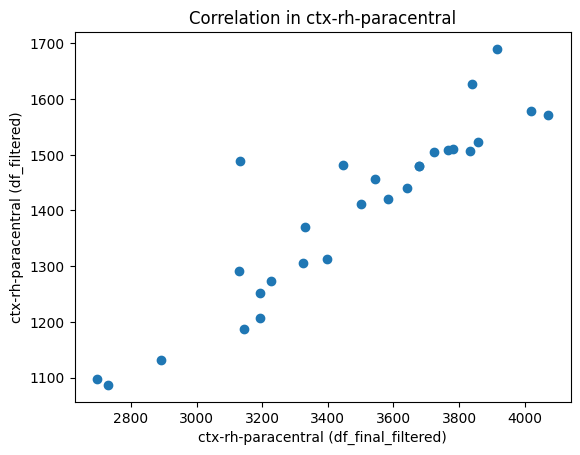


Correlation in ctx-rh-parahippocampal: 0.7568202621634791


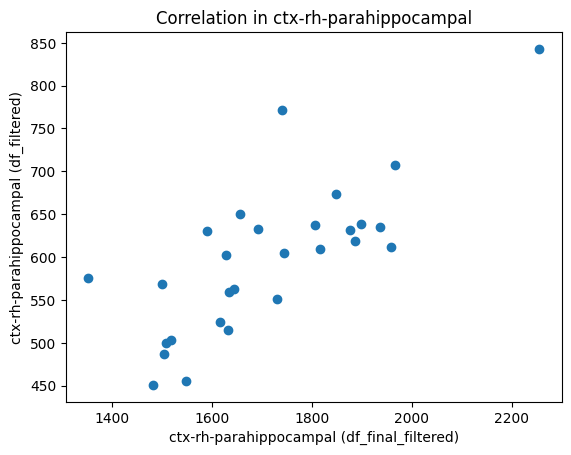


Correlation in ctx-rh-parsopercularis: 0.8755771323859347


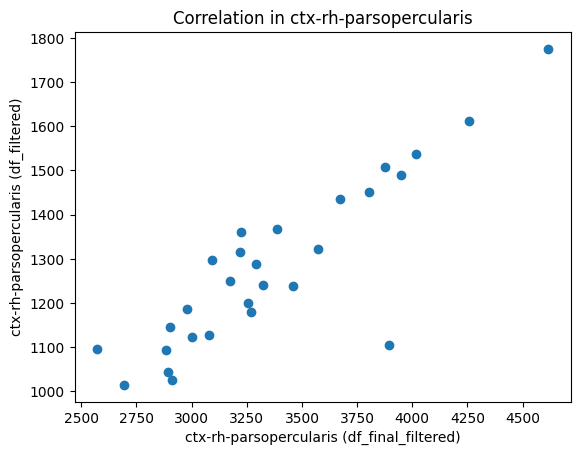


Correlation in ctx-rh-parsorbitalis: 0.8323053476841845


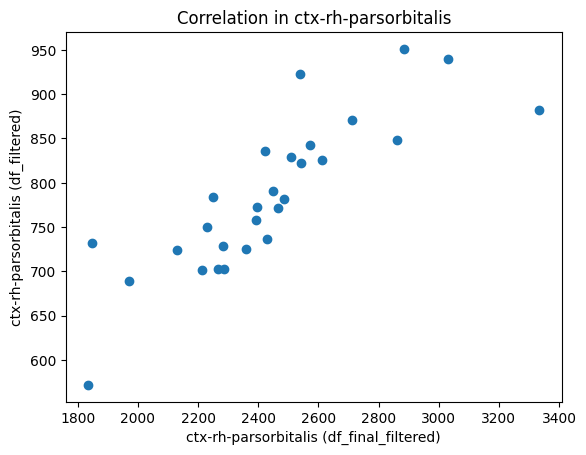


Correlation in ctx-rh-parstriangularis: 0.8034899898547532


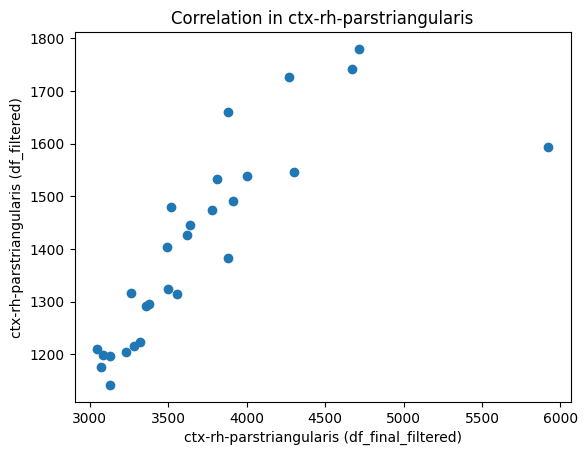


Correlation in ctx-rh-pericalcarine: 0.9470068525915164


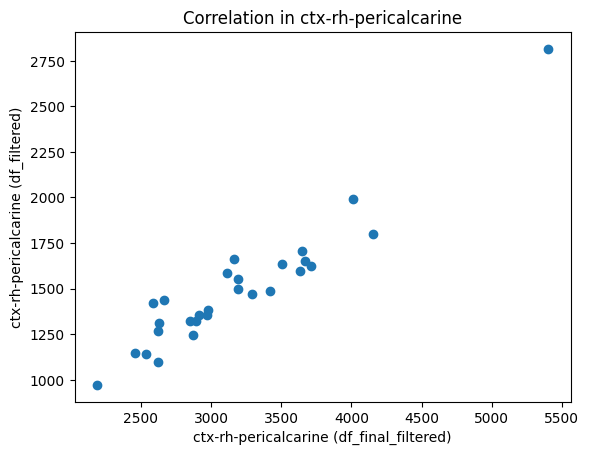


Correlation in ctx-rh-postcentral: 0.8309592797898346


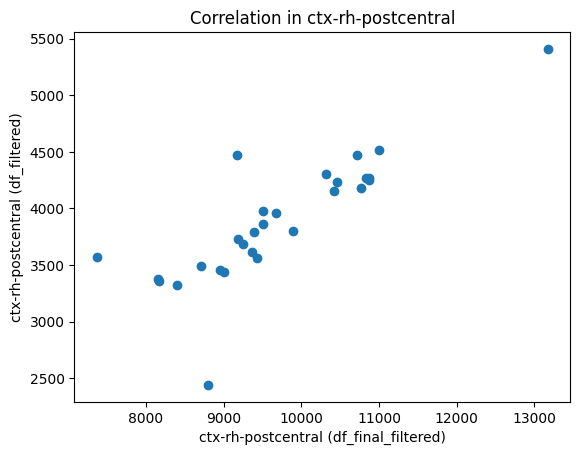


Correlation in ctx-rh-posteriorcingulate: 0.9535350360465734


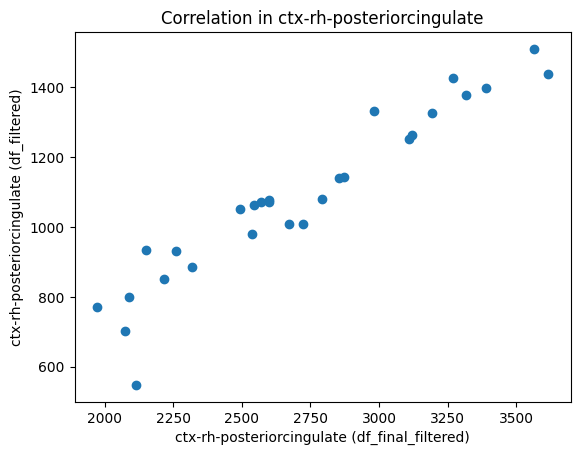


Correlation in ctx-rh-precentral: 0.8662017909035241


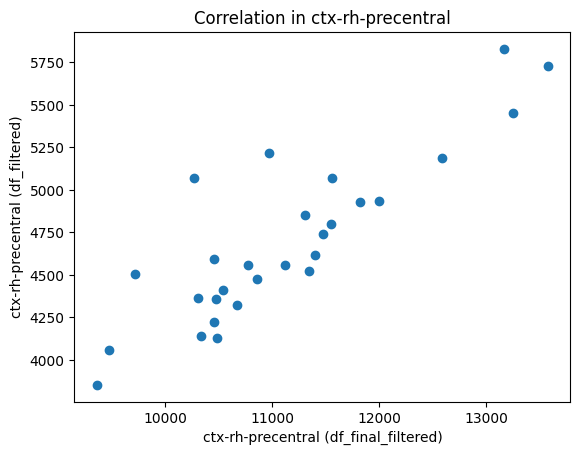


Correlation in ctx-rh-precuneus: 0.63294998791423


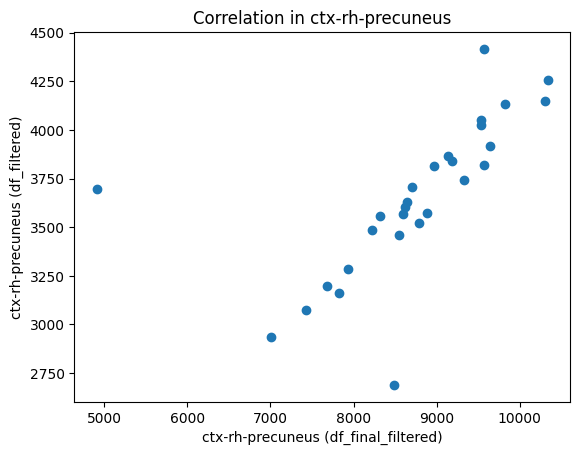


Correlation in ctx-rh-rostralanteriorcingulate: 0.9571982329333488


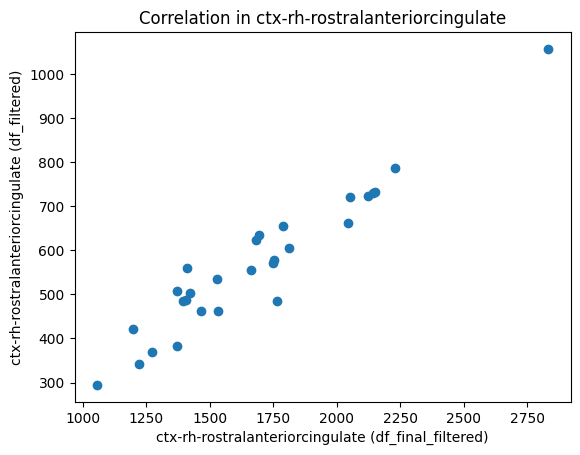


Correlation in ctx-rh-rostralmiddlefrontal: 0.6889814728566652


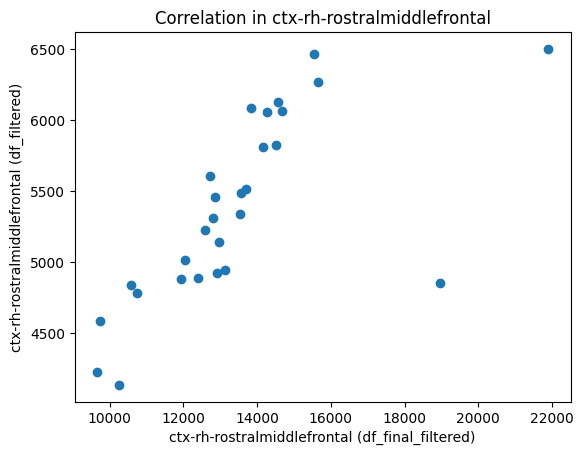


Correlation in ctx-rh-superiorfrontal: 0.7722217275480951


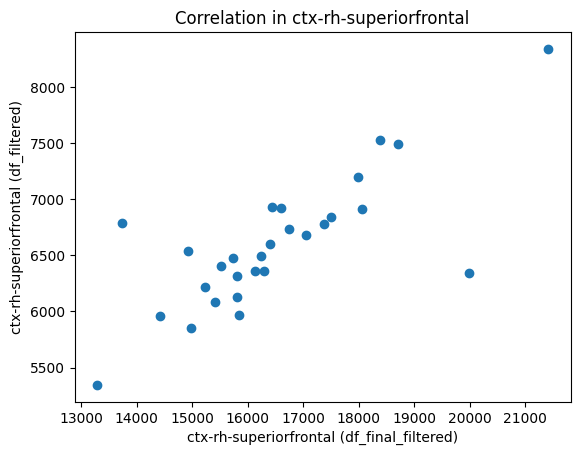


Correlation in ctx-rh-superiorparietal: 0.4266158429511714


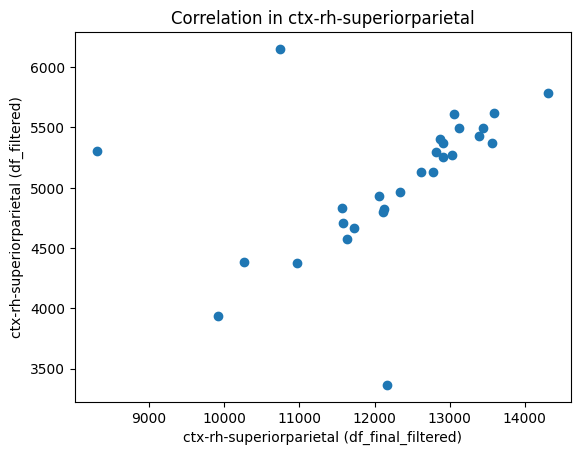


Correlation in ctx-rh-superiortemporal: 0.8594461758249525


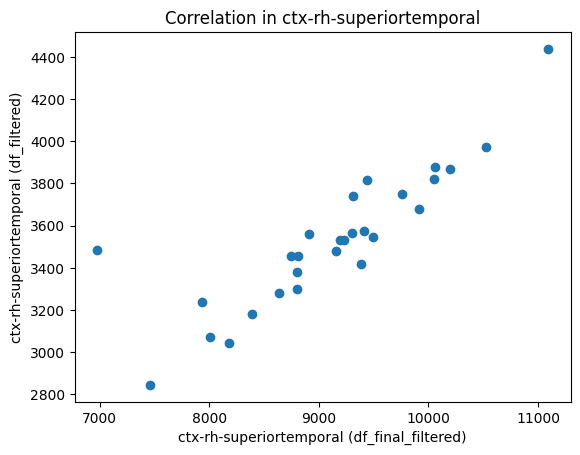


Correlation in ctx-rh-supramarginal: 0.6614325342959999


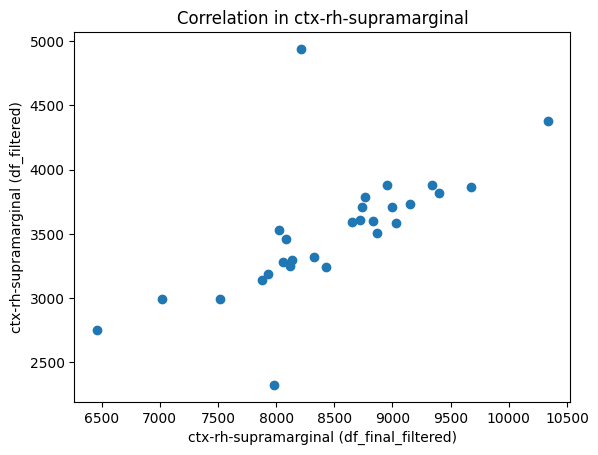


Correlation in ctx-rh-temporalpole: 0.7277149479888282


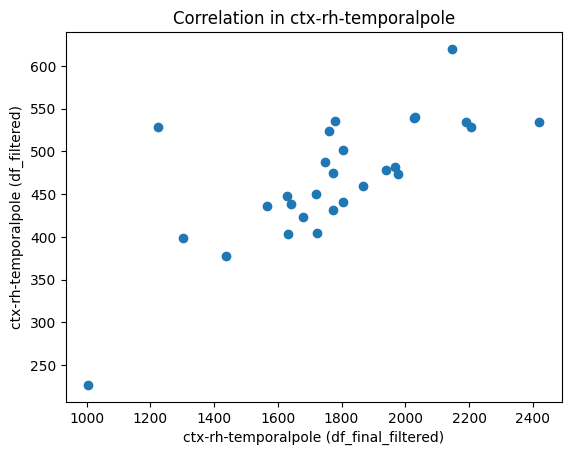


Correlation in ctx-rh-transversetemporal: 0.900534274697435


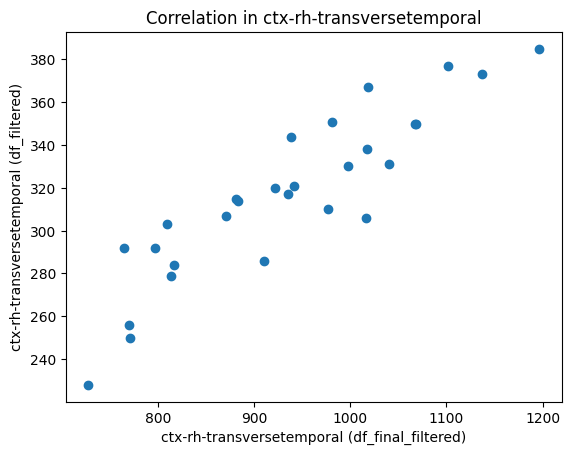


Correlation in ctx-lh-insula: 0.8417145549639063


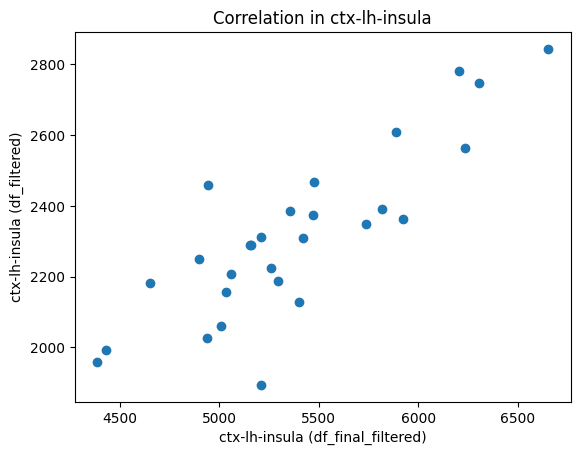


Correlation in ctx-rh-insula: 0.7959911138765823


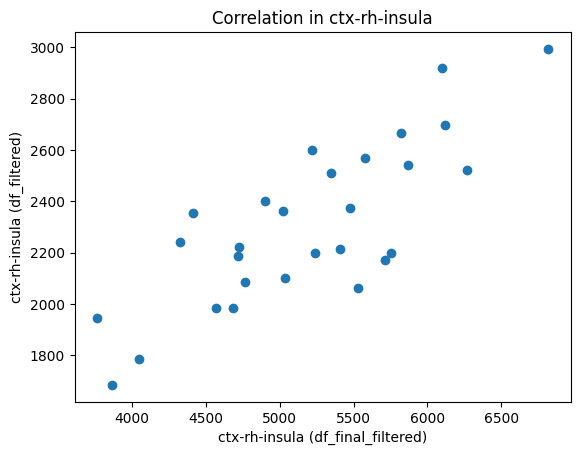


Correlation in ctx-lh-bankssts: 0.9228936923516121


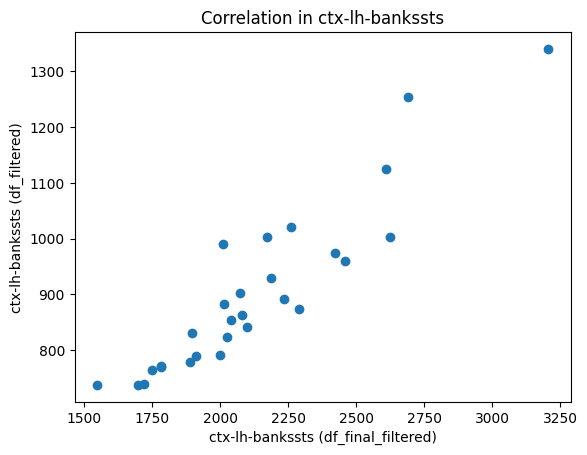


Correlation in ctx-lh-caudalanteriorcingulate: 0.9200892273545191


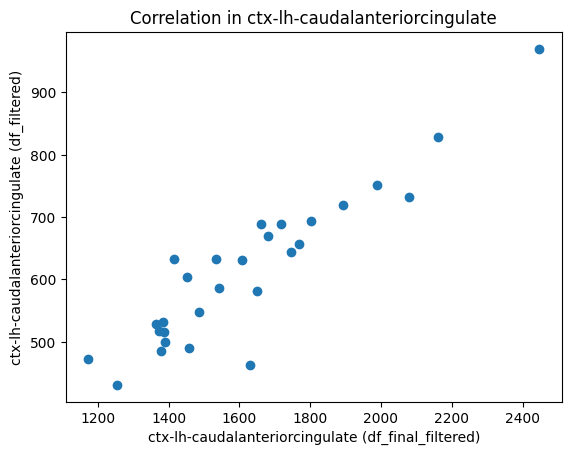


Correlation in ctx-lh-caudalmiddlefrontal: 0.9513882172623254


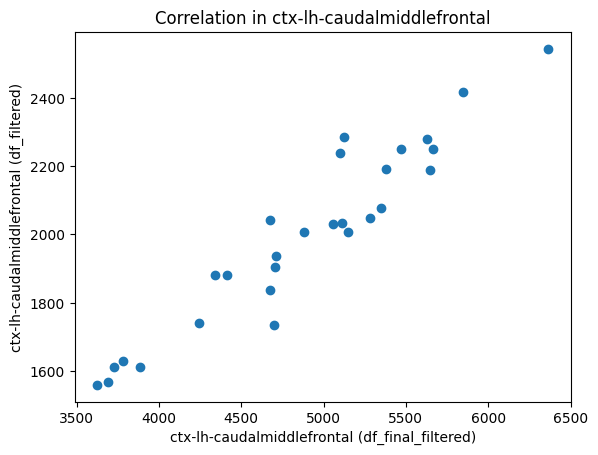


Correlation in ctx-lh-cuneus: 0.9296780971829119


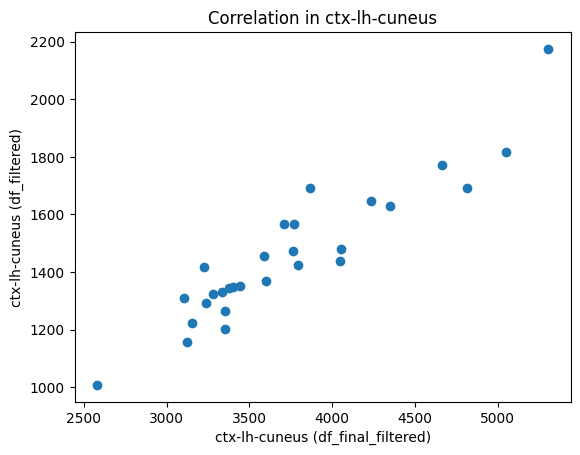


Correlation in ctx-lh-entorhinal: 0.5036695782985114


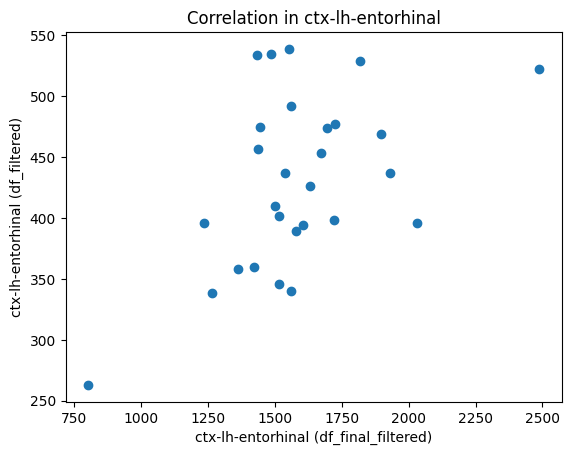


Correlation in ctx-lh-frontalpole: 0.7334399885742313


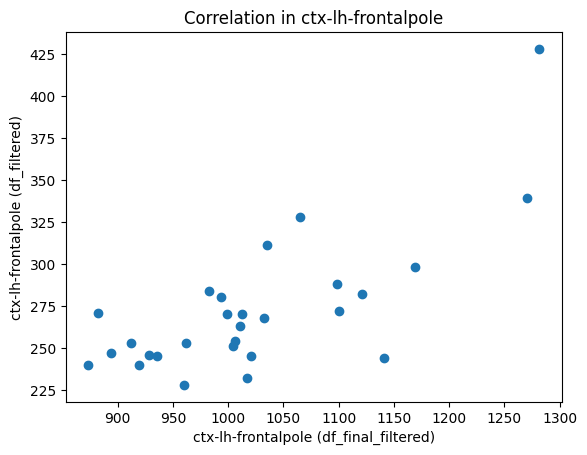


Correlation in ctx-lh-fusiform: 0.9471980400005753


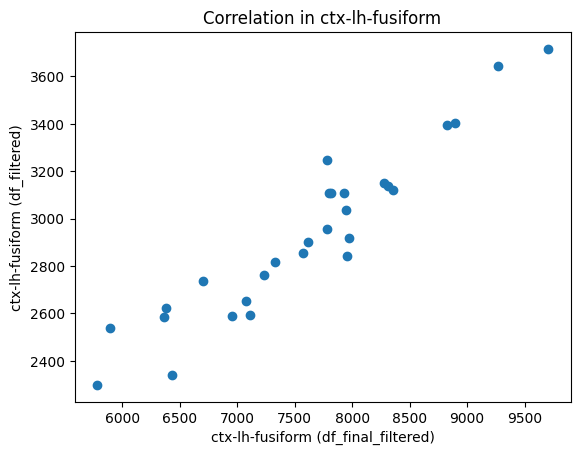


Correlation in ctx-lh-inferiorparietal: 0.9897236443824533


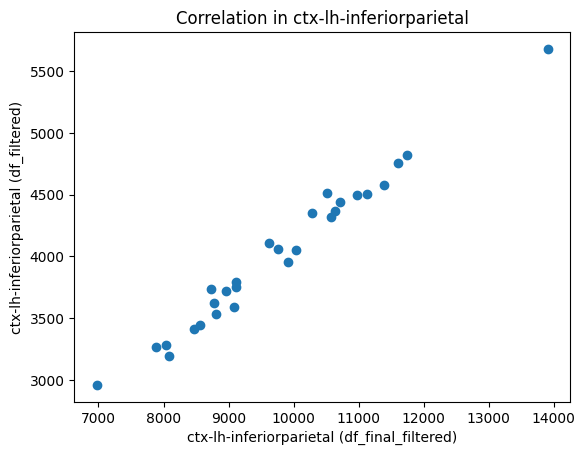


Correlation in ctx-lh-inferiortemporal: 0.9482513876711072


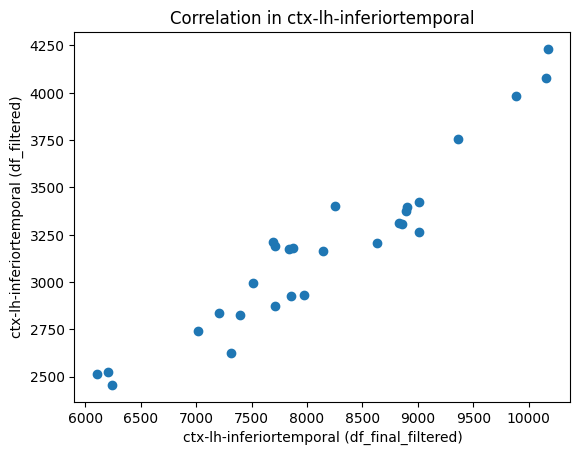


Correlation in ctx-lh-isthmuscingulate: 0.9509626359054871


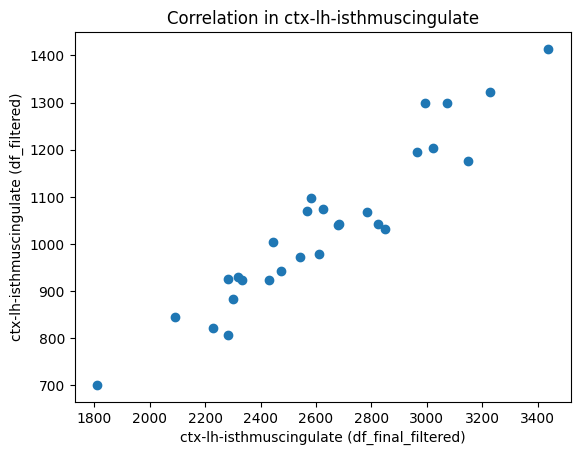


Correlation in ctx-lh-lateraloccipital: 0.9649646394180064


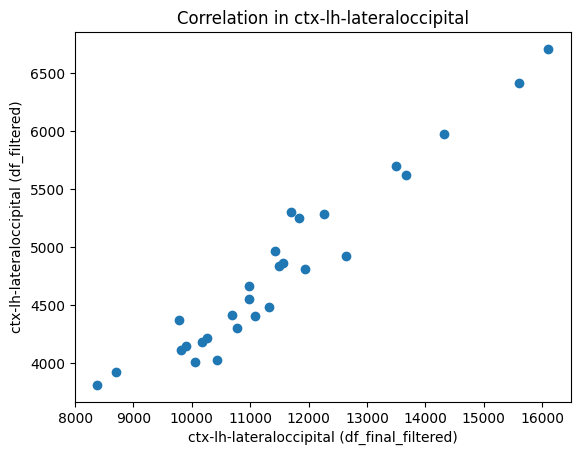


Correlation in ctx-lh-lateralorbitofrontal: 0.9255286775767528


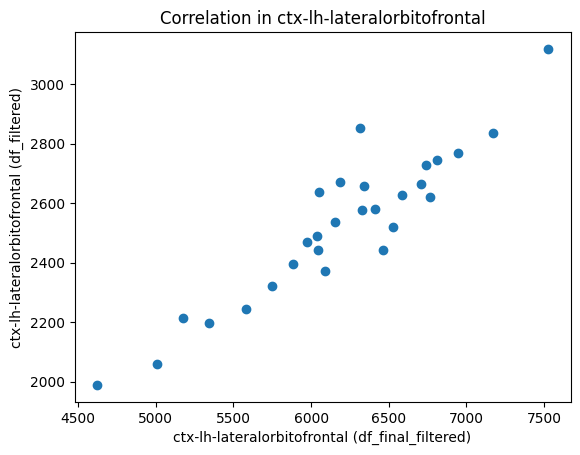


Correlation in ctx-lh-lingual: 0.9668154230385092


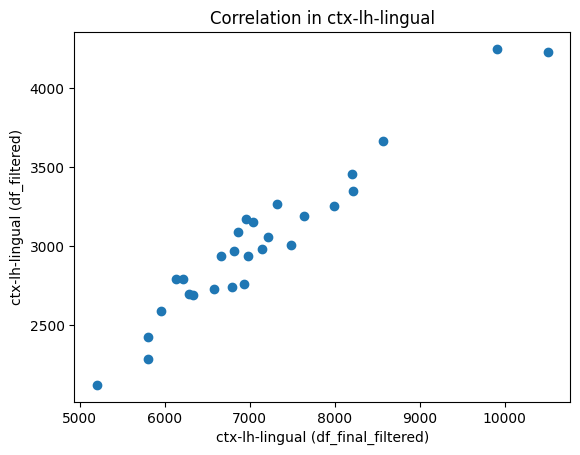


Correlation in ctx-lh-medialorbitofrontal: 0.7661287526733097


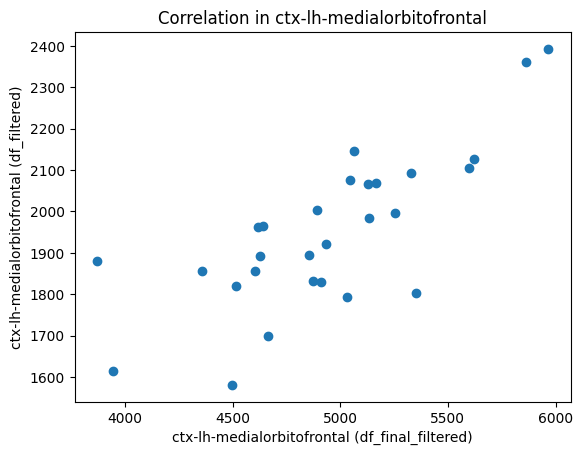


Correlation in ctx-lh-middletemporal: 0.9301068121537491


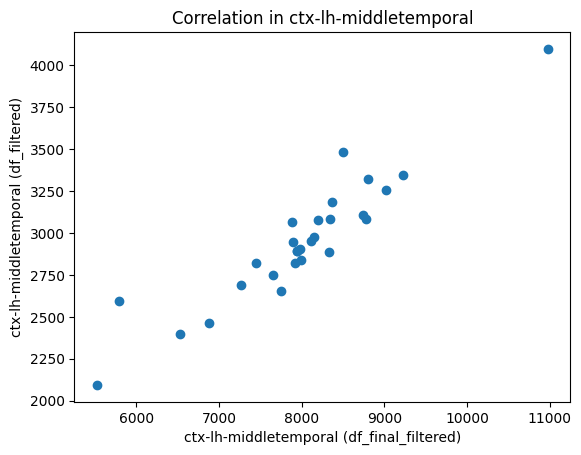


Correlation in ctx-lh-paracentral: 0.943076883274105


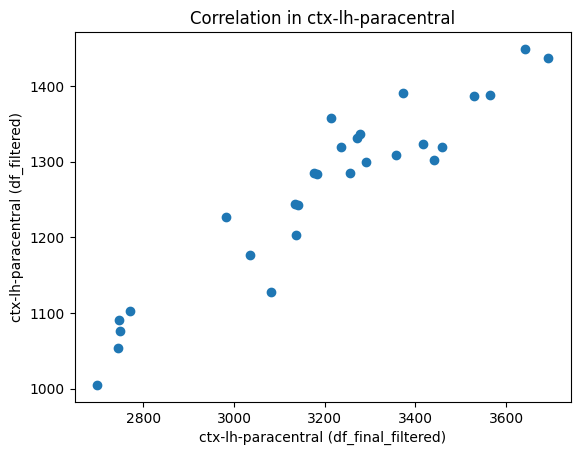


Correlation in ctx-lh-parahippocampal: 0.7341560173520961


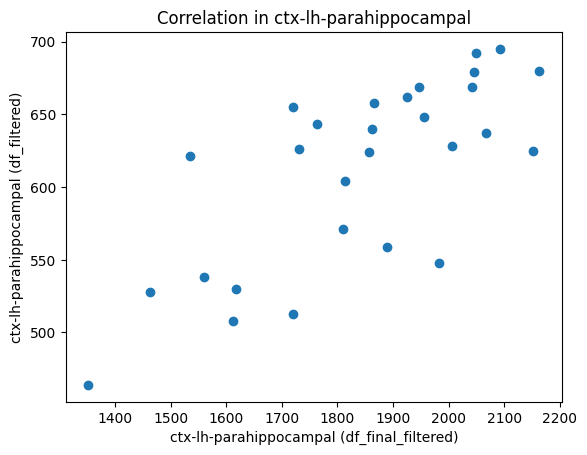


Correlation in ctx-lh-parsopercularis: 0.9626788551136565


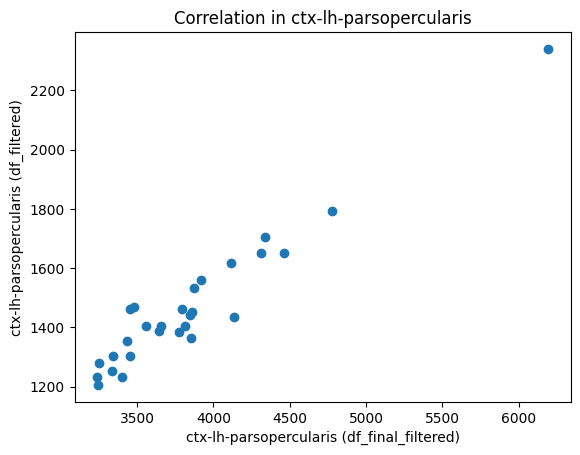


Correlation in ctx-lh-parsorbitalis: 0.6360968706725546


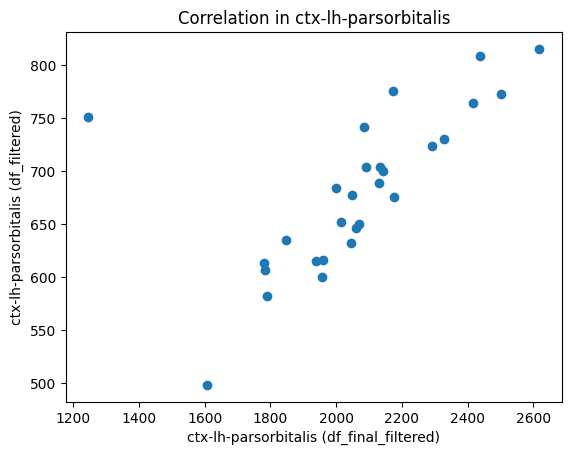


Correlation in ctx-lh-parstriangularis: 0.9532253592613833


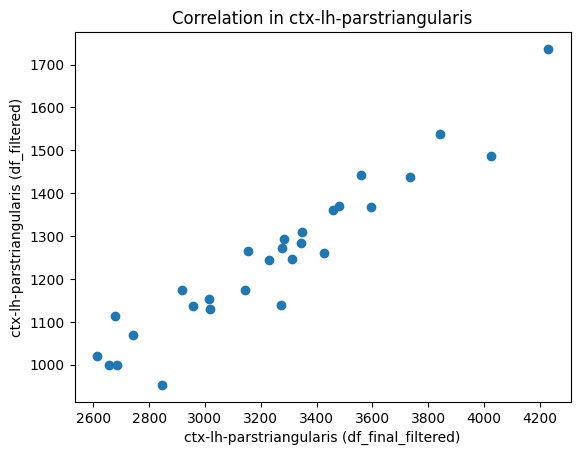


Correlation in ctx-lh-pericalcarine: 0.932435706047365


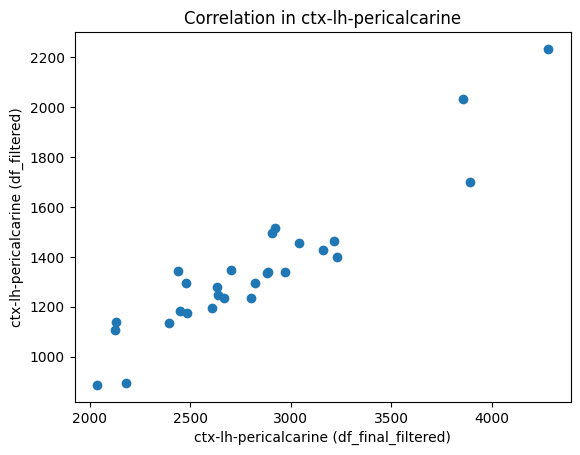


Correlation in ctx-lh-postcentral: 0.9490452129594258


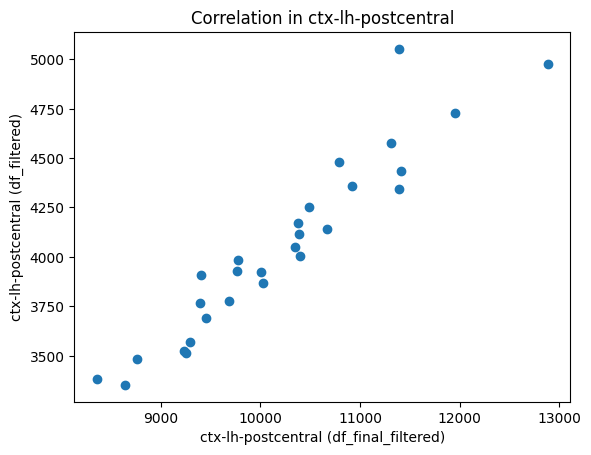


Correlation in ctx-lh-posteriorcingulate: 0.9236946032127015


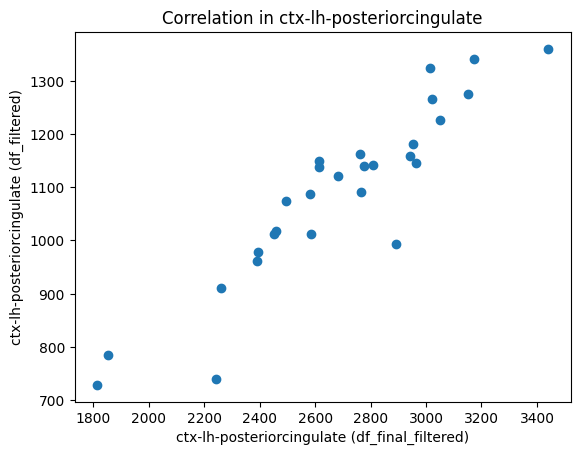


Correlation in ctx-lh-precentral: 0.9531372048365577


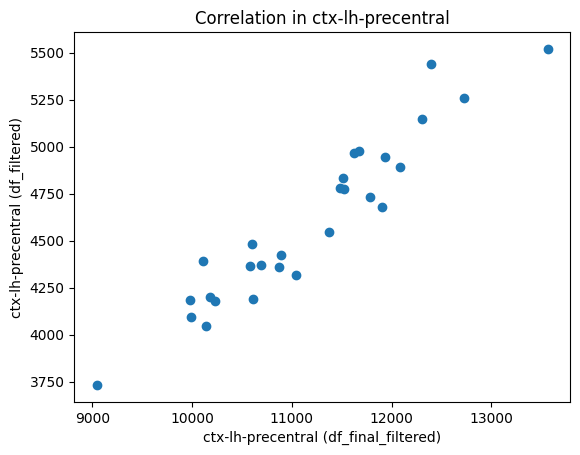


Correlation in ctx-lh-precuneus: 0.9585914719865988


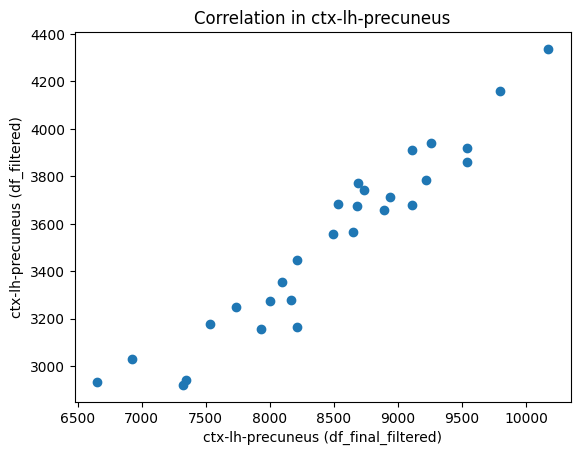


Correlation in ctx-lh-rostralanteriorcingulate: 0.8052006753803007


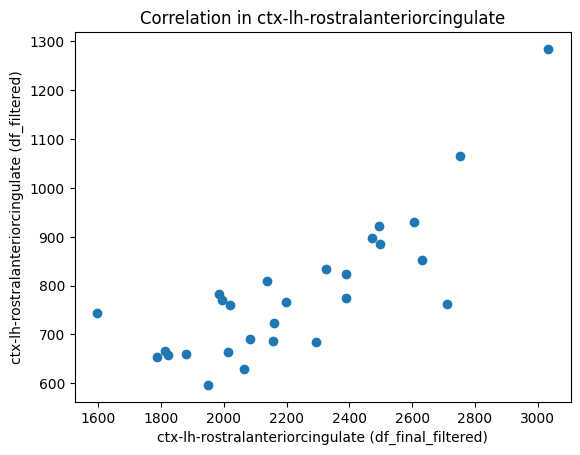


Correlation in ctx-lh-rostralmiddlefrontal: 0.9556257512160616


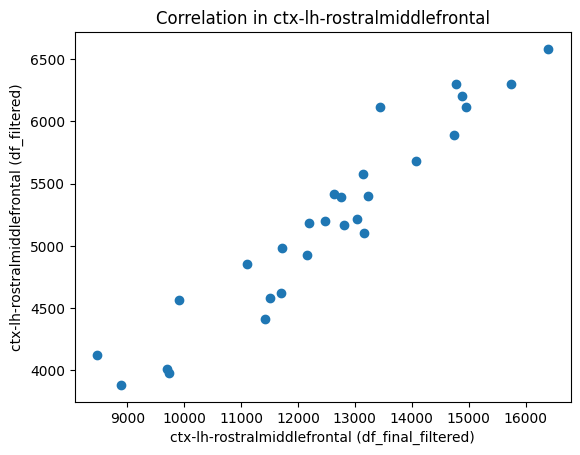


Correlation in ctx-lh-superiorfrontal: 0.9438208320854644


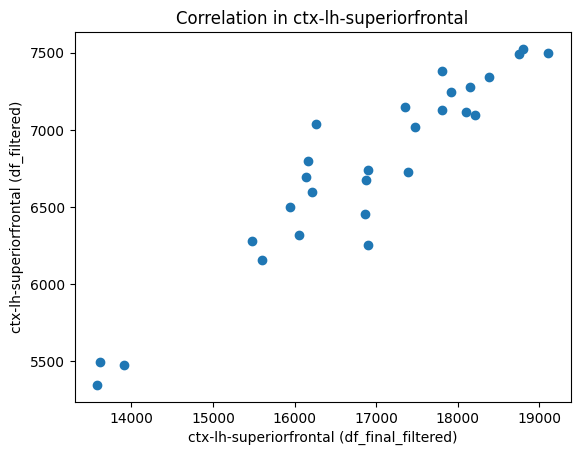


Correlation in ctx-lh-superiorparietal: 0.9802810589473253


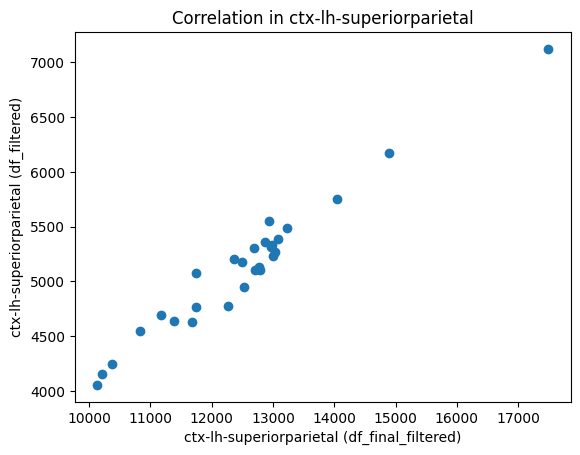


Correlation in ctx-lh-superiortemporal: 0.9490795672675164


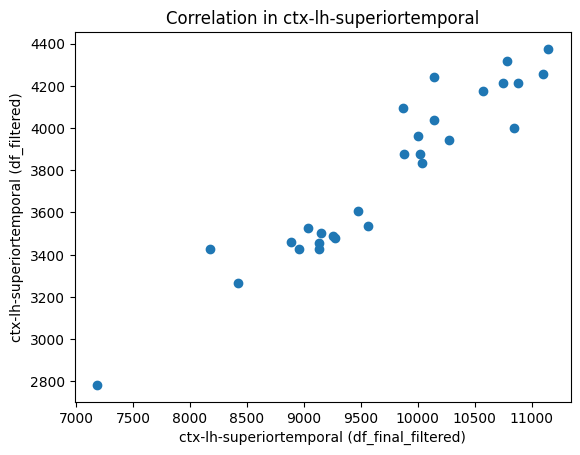


Correlation in ctx-lh-supramarginal: 0.9617032523548058


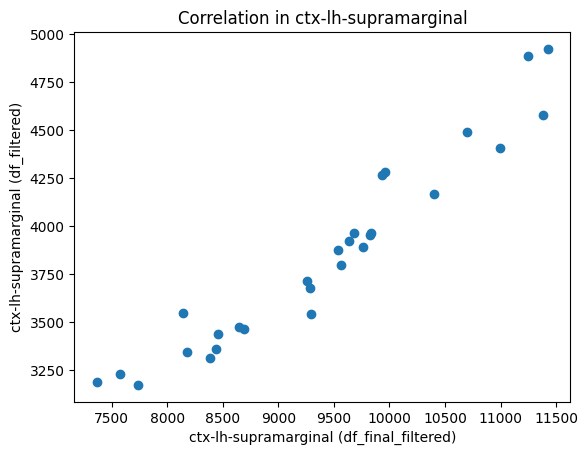


Correlation in ctx-lh-temporalpole: 0.768626423179252


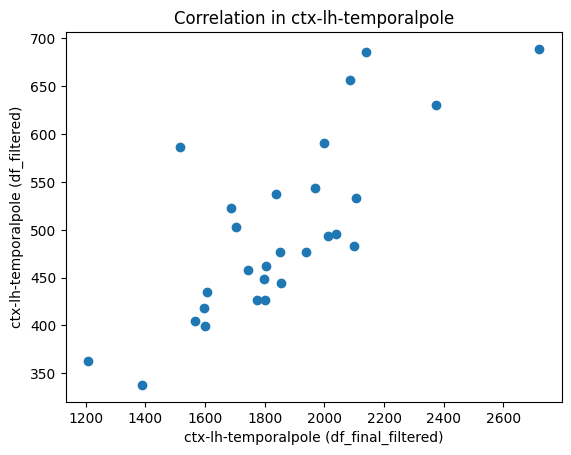


Correlation in ctx-lh-transversetemporal: 0.8976745294651699


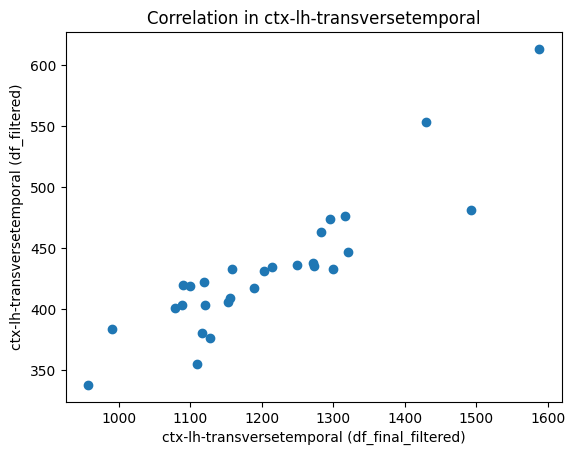


Correlation in ctx-rh-bankssts: 0.9142586706357753


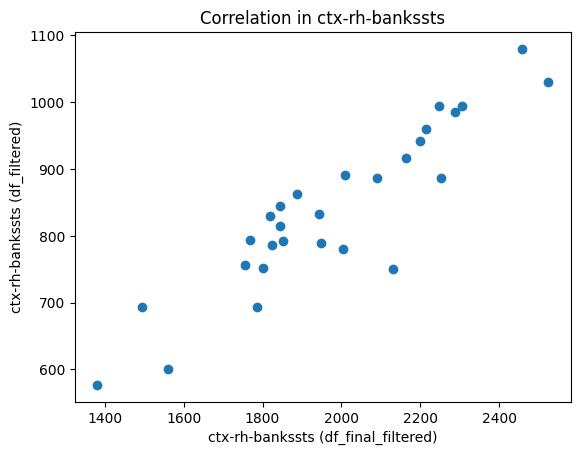


Correlation in ctx-rh-caudalanteriorcingulate: 0.9028311294748277


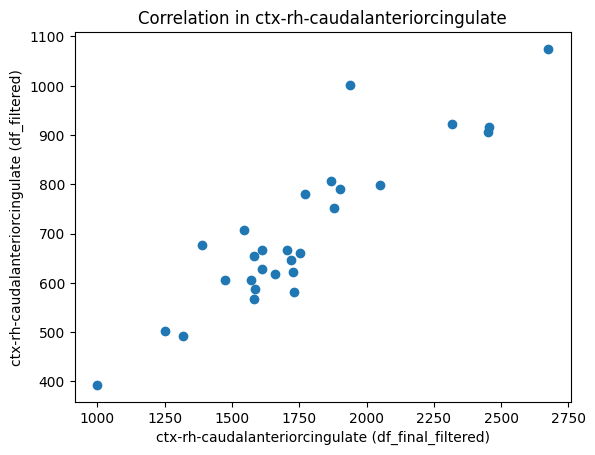


Correlation in ctx-rh-caudalmiddlefrontal: 0.4871509855920991


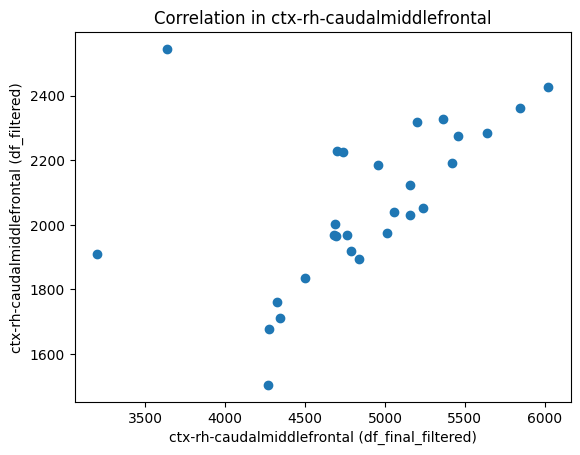


Correlation in ctx-rh-cuneus: 0.9412424150448117


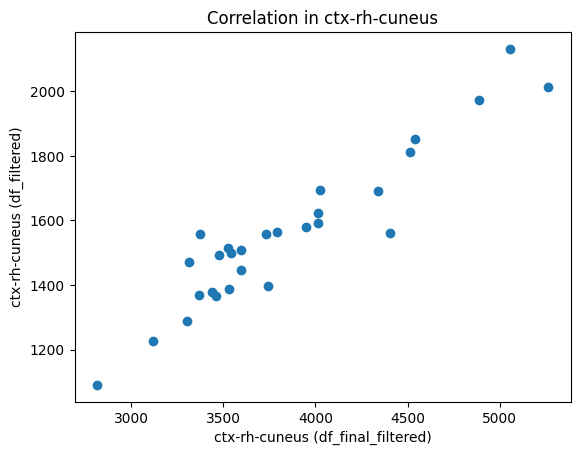


Correlation in ctx-rh-entorhinal: 0.7284325224154775


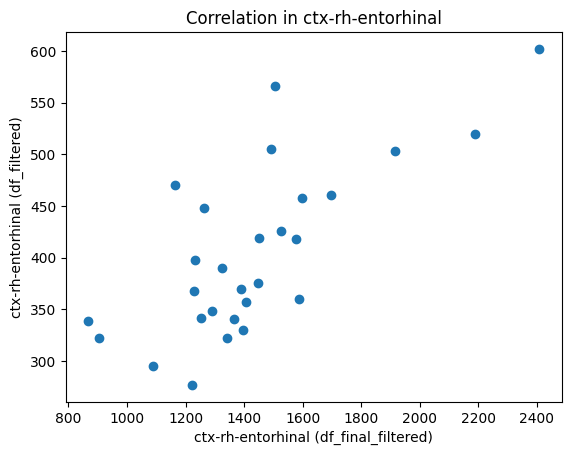


Correlation in ctx-rh-frontalpole: 0.30143859135694306


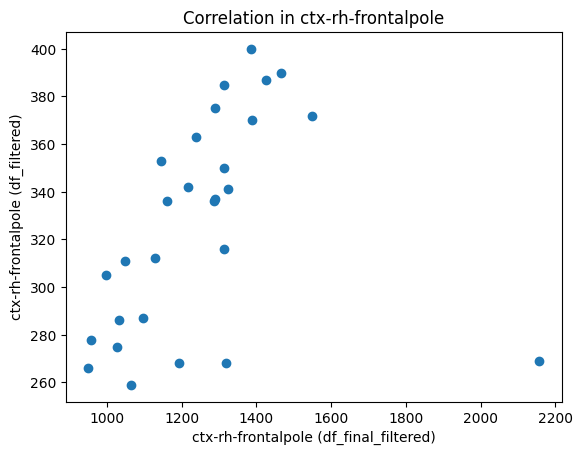


Correlation in ctx-rh-fusiform: 0.875584633537431


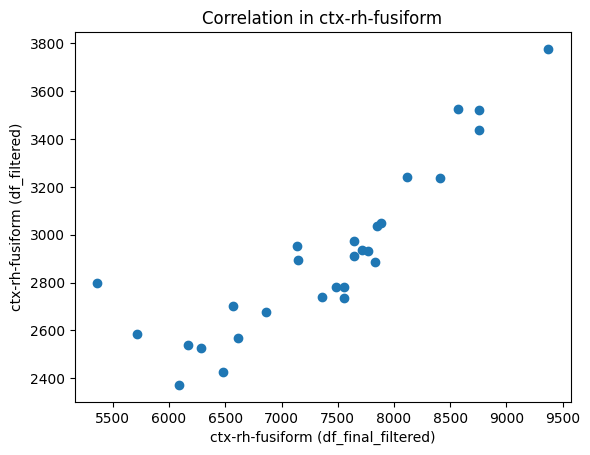


Correlation in ctx-rh-inferiorparietal: 0.9393900989893702


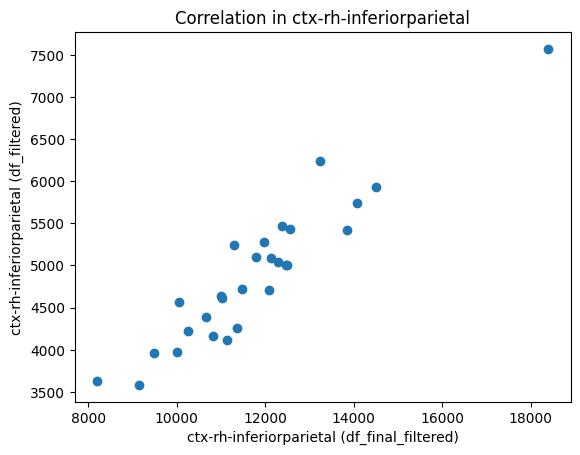


Correlation in ctx-rh-inferiortemporal: 0.7967077382147394


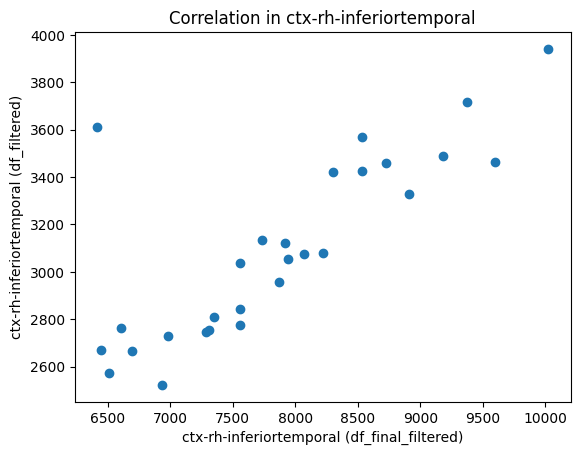


Correlation in ctx-rh-isthmuscingulate: 0.8771859641159688


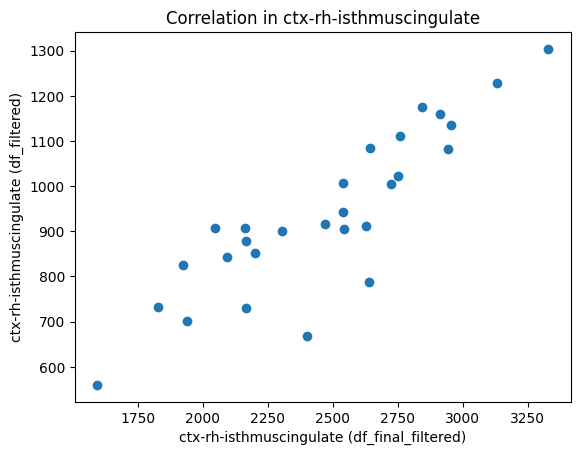


Correlation in ctx-rh-lateraloccipital: 0.9875989948382232


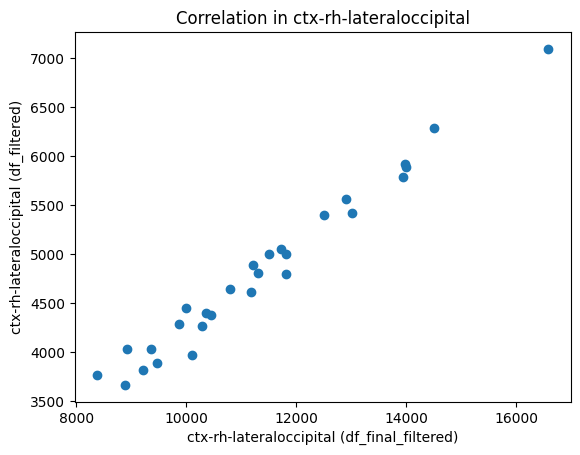


Correlation in ctx-rh-lateralorbitofrontal: 0.7264543032815515


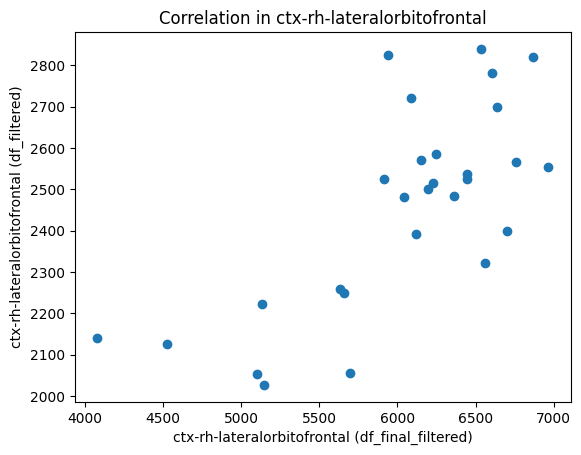


Correlation in ctx-rh-lingual: 0.9699364458893416


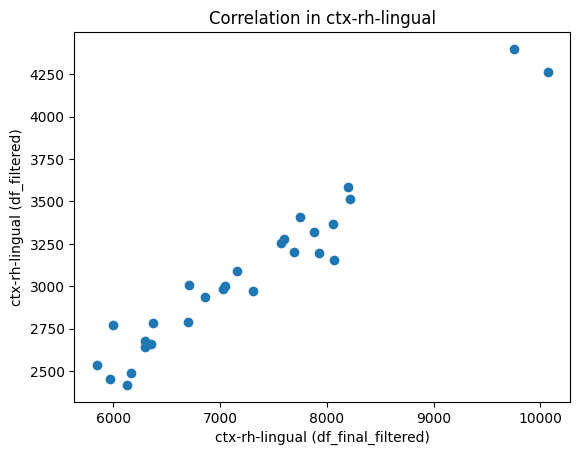


Correlation in ctx-rh-medialorbitofrontal: 0.8036109736524816


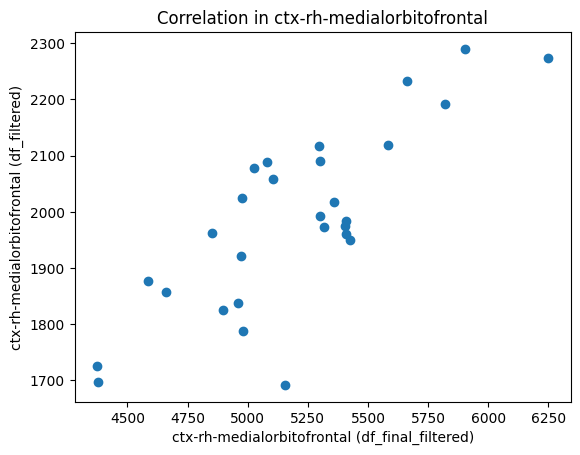


Correlation in ctx-rh-middletemporal: 0.827388616100263


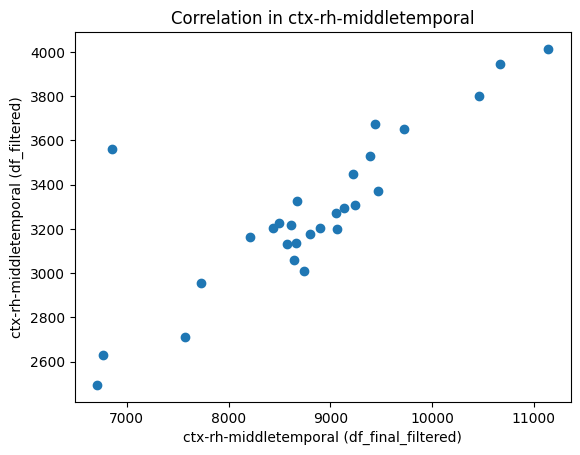


Table of correlations:
                      Structure  Correlation
0            ctx-rh-paracentral     0.916327
1        ctx-rh-parahippocampal     0.756820
2        ctx-rh-parsopercularis     0.875577
3          ctx-rh-parsorbitalis     0.832305
4       ctx-rh-parstriangularis     0.803490
..                          ...          ...
63      ctx-rh-lateraloccipital     0.987599
64  ctx-rh-lateralorbitofrontal     0.726454
65               ctx-rh-lingual     0.969936
66   ctx-rh-medialorbitofrontal     0.803611
67        ctx-rh-middletemporal     0.827389

[68 rows x 2 columns]


In [ ]:
df_filtered = df_filtered.set_index("PTID")

common_columns = df_final_filtered.columns.intersection(df_filtered.columns)

df_final_filtered = df_final_filtered[common_columns]
df_filtered = df_filtered[common_columns]

df_final_filtered = df_final_filtered.loc[df_filtered.index]
df_filtered = df_filtered.loc[df_final_filtered.index]

correlation_results = []

for col in common_columns:
    df_col_final = df_final_filtered[col].astype(float)
    df_col_filtered = df_filtered[col].astype(float)

    if df_col_final.nunique() > 1 and df_col_filtered.nunique() > 1:
        correlation_value = df_col_final.corr(df_col_filtered)
    else:
        correlation_value = None

    correlation_results.append((col, correlation_value))

    print(f"\n=============================")
    print(f"Correlation in {col}: {correlation_value}")
    print("=============================")

    if correlation_value is not None:
        plt.scatter(df_col_final, df_col_filtered)
        plt.xlabel(f'{col} (df_final_filtered)')
        plt.ylabel(f'{col} (df_filtered)')
        plt.title(f'Correlation in {col}')
        plt.show()

df_correlation_results = pd.DataFrame(correlation_results, columns=['Structure', 'Correlation'])
print("\nTable of correlations:")
print(df_correlation_results)

In [ ]:
df_correlation_results_sorted = df_correlation_results.sort_values(by="Correlation", ascending=False)

df_correlation_results_sorted.to_csv("Area.csv", index=False)

df_correlation_results_sorted

,Structure,Correlation
27,ctx-lh-inferiorparietal,0.989724
63,ctx-rh-lateraloccipital,0.987599
48,ctx-lh-superiorparietal,0.980281
65,ctx-rh-lingual,0.969936
32,ctx-lh-lingual,0.966815
...,...,...
9,ctx-rh-precuneus,0.632950
24,ctx-lh-entorhinal,0.503670
55,ctx-rh-caudalmiddlefrontal,0.487151
13,ctx-rh-superiorparietal,0.426616
